
# Lab 2: Runtime Analysis

## <font color=DarkRed>Your Exercise: Performance of `del` keyword</font>

Devise an experiment that compares the performance of the `del` operator on lists and dictionaries.

### Helpful Code

In [1]:
# # Make two lists of random 'data'
# import random 
# arry1 = [random.random() for i in range(50000)]
# arry2 = [random.random() for i in range(50000)]

# # Create a simple dictionary of key:val pairs using these two lists
# d1 = dict(zip(arry1,arry2)) 

# # How the deletion of a dictionary key works
# print(d1)
# d_keys = list(d1.keys()) 
# del d1[d_keys[0]]
# print(d1)

# # Print an empty line for spacing
# print()

# # How the deletion of a list element works
# print(arry1)
# del arry1[0]
# print(arry1)

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct.*

In [1]:
# Import library
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def del_dict(x,n):
    '''
    This is a function that evaluate the average processing time for del operation on a dictionary under n times of testing
    
    Signature: Kefu Zhu
    '''
    # Get some keys for deletion
    d_keys = random.sample(list(x.keys()), n)
    # Initialize an empty list to store the processing time of del operation for each test
    del_time = []

    # Delete one key from the list at a time. Performe the deletion multiple times and record the running time for every deletion
    for k in d_keys:
        # Record the start time
        s = time.time()
        # Delete the key from the dictionary
        del x[k]
        # Record the end time
        e = time.time()
        # Add the processing time to the list
        del_time.append(e-s)
    
    # Return the average processing time
    return sum(del_time)/float(len(del_time))

In [3]:
def del_list(x,n):
    '''
    This is a function that evaluate the average processing time for del operation on a list under n times of testing
    
    Signature: Kefu Zhu
    '''
    # Get some index for deletion
    index_list = random.sample(range(len(x)), n)
    # Initialize an empty list to store the processing time of del operation for each test
    del_time = []
    # Make a deep copy of the original index for repeating experiment
    deep_copy = [a for a in x]

    # Delete one element from the list at a time using index refence. Performe the deletion multiple times and record the running time for every deletion
    for i in index_list:
        # Record the start time
        s = time.time()
        # Delete the element at index i from the list
        del x[i]
        # Record the end time
        e = time.time()
        # Recover the original list using its deep copy
        x = [a for a in deep_copy]
        # Add the processing time to the list
        del_time.append(e-s)
    
    # Return the average processing time
    return sum(del_time)/float(len(del_time))

## Testing

For full credit, you must also test your solution so that you can prove to the grade your solution works.

In [4]:
# Time of testing the performance of del
test_times = 100
# Create different size for testing
test_runs = range(10000,110000,10000)
# Create an empty dataframe to store test results, use the size of each test object as index
test_results = pd.DataFrame(columns = ['list_del_time','dict_del_time'], index = test_runs)
# Create different size of lists and dictionaries for evaluations
for size in test_runs:
    # Create random lists and dictionary, prepare for evaluation
    arry1 = [random.random() for i in range(size)]
    arry2 = [random.random() for i in range(size)]
    d1 = dict(zip(arry1,arry2))
    # Evaluate list deletion time and store the result into dataframe
    test_results['list_del_time'][size] = del_list(arry1, test_times)
    # Evaluate dictionary deletion time and store the result into dataframe
    test_results['dict_del_time'][size] = del_dict(d1, test_times)

In [5]:
# Print the dataframe
test_results

,list_del_time,dict_del_time
10000,5.04041e-06,6.95622e-07
20000,4.72681e-06,4.56146e-07
30000,7.8343e-06,5.07462e-07
40000,1.63699e-05,5.70182e-07
50000,1.43401e-05,6.15797e-07
60000,1.9677e-05,7.5264e-07
70000,3.2067e-05,6.95622e-07
80000,2.87942e-05,6.67113e-07
90000,4.64413e-05,7.07026e-07
100000,5.32835e-05,7.35535e-07


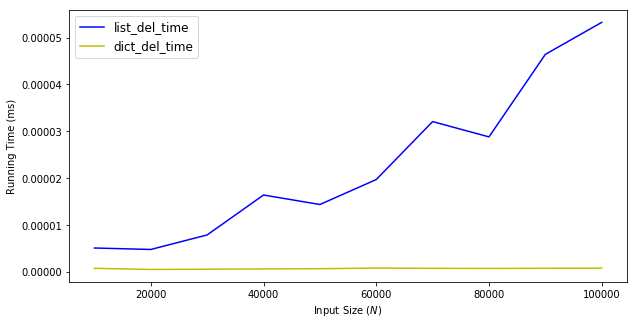

In [6]:
# Visualize the test results
fig, ax = plt.subplots()
# Set axis name
plt.ylabel("Running Time (s)")
plt.xlabel("Input Size ($N$)")
# Add test result of list deletion
ax.plot(test_results.index,test_results['list_del_time'], label='list_del_time', color='b')
# Add test result of dictionaray deletion
ax.plot(test_results.index,test_results['dict_del_time'], label='dict_del_time', color='y')
# Add legend
legend = plt.legend(loc='upper left', fontsize='large')
# Set plot size
fig.set_size_inches(10,5)
# Show
plt.show()

**Conclustion**: The `del` operation is faster on dictionary than on list. Based on the experiment above, we can see the `del` operation is slower on list as the size of it increases, but it remains steady performance on dictionary. In fact, the `del` operation is $O(N)$ for list and $O(1)$ for dictionary 